In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### 读取数据文件

In [2]:
train_data_file = "./zhengqi_train.txt"
test_data_file =  "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

### 查看训练集特征变量信息

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

### 查看数据统计信息

In [5]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


### 画箱型图探索数据

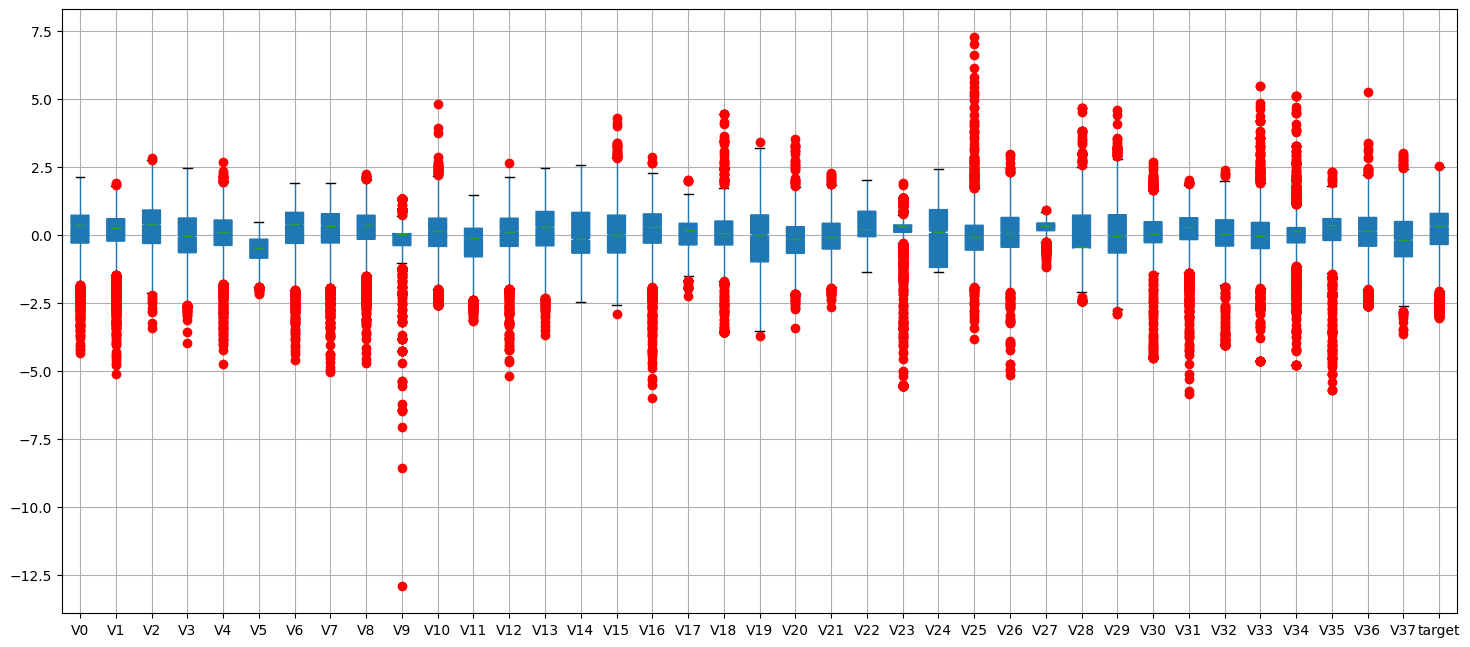

In [6]:
plt.figure(figsize=(18,8),dpi=100)
train_data.boxplot(sym='r', patch_artist=True, notch=True)
plt.show()

### 查看数据分布图

#### 查看特征变量‘V0’的数据分布直方图，并绘制Q-Q图查看数据是否近似于正态分布

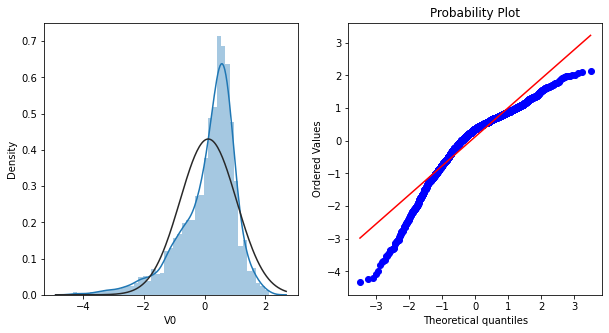

In [7]:

plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(train_data['V0'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(train_data['V0'], plot=plt)

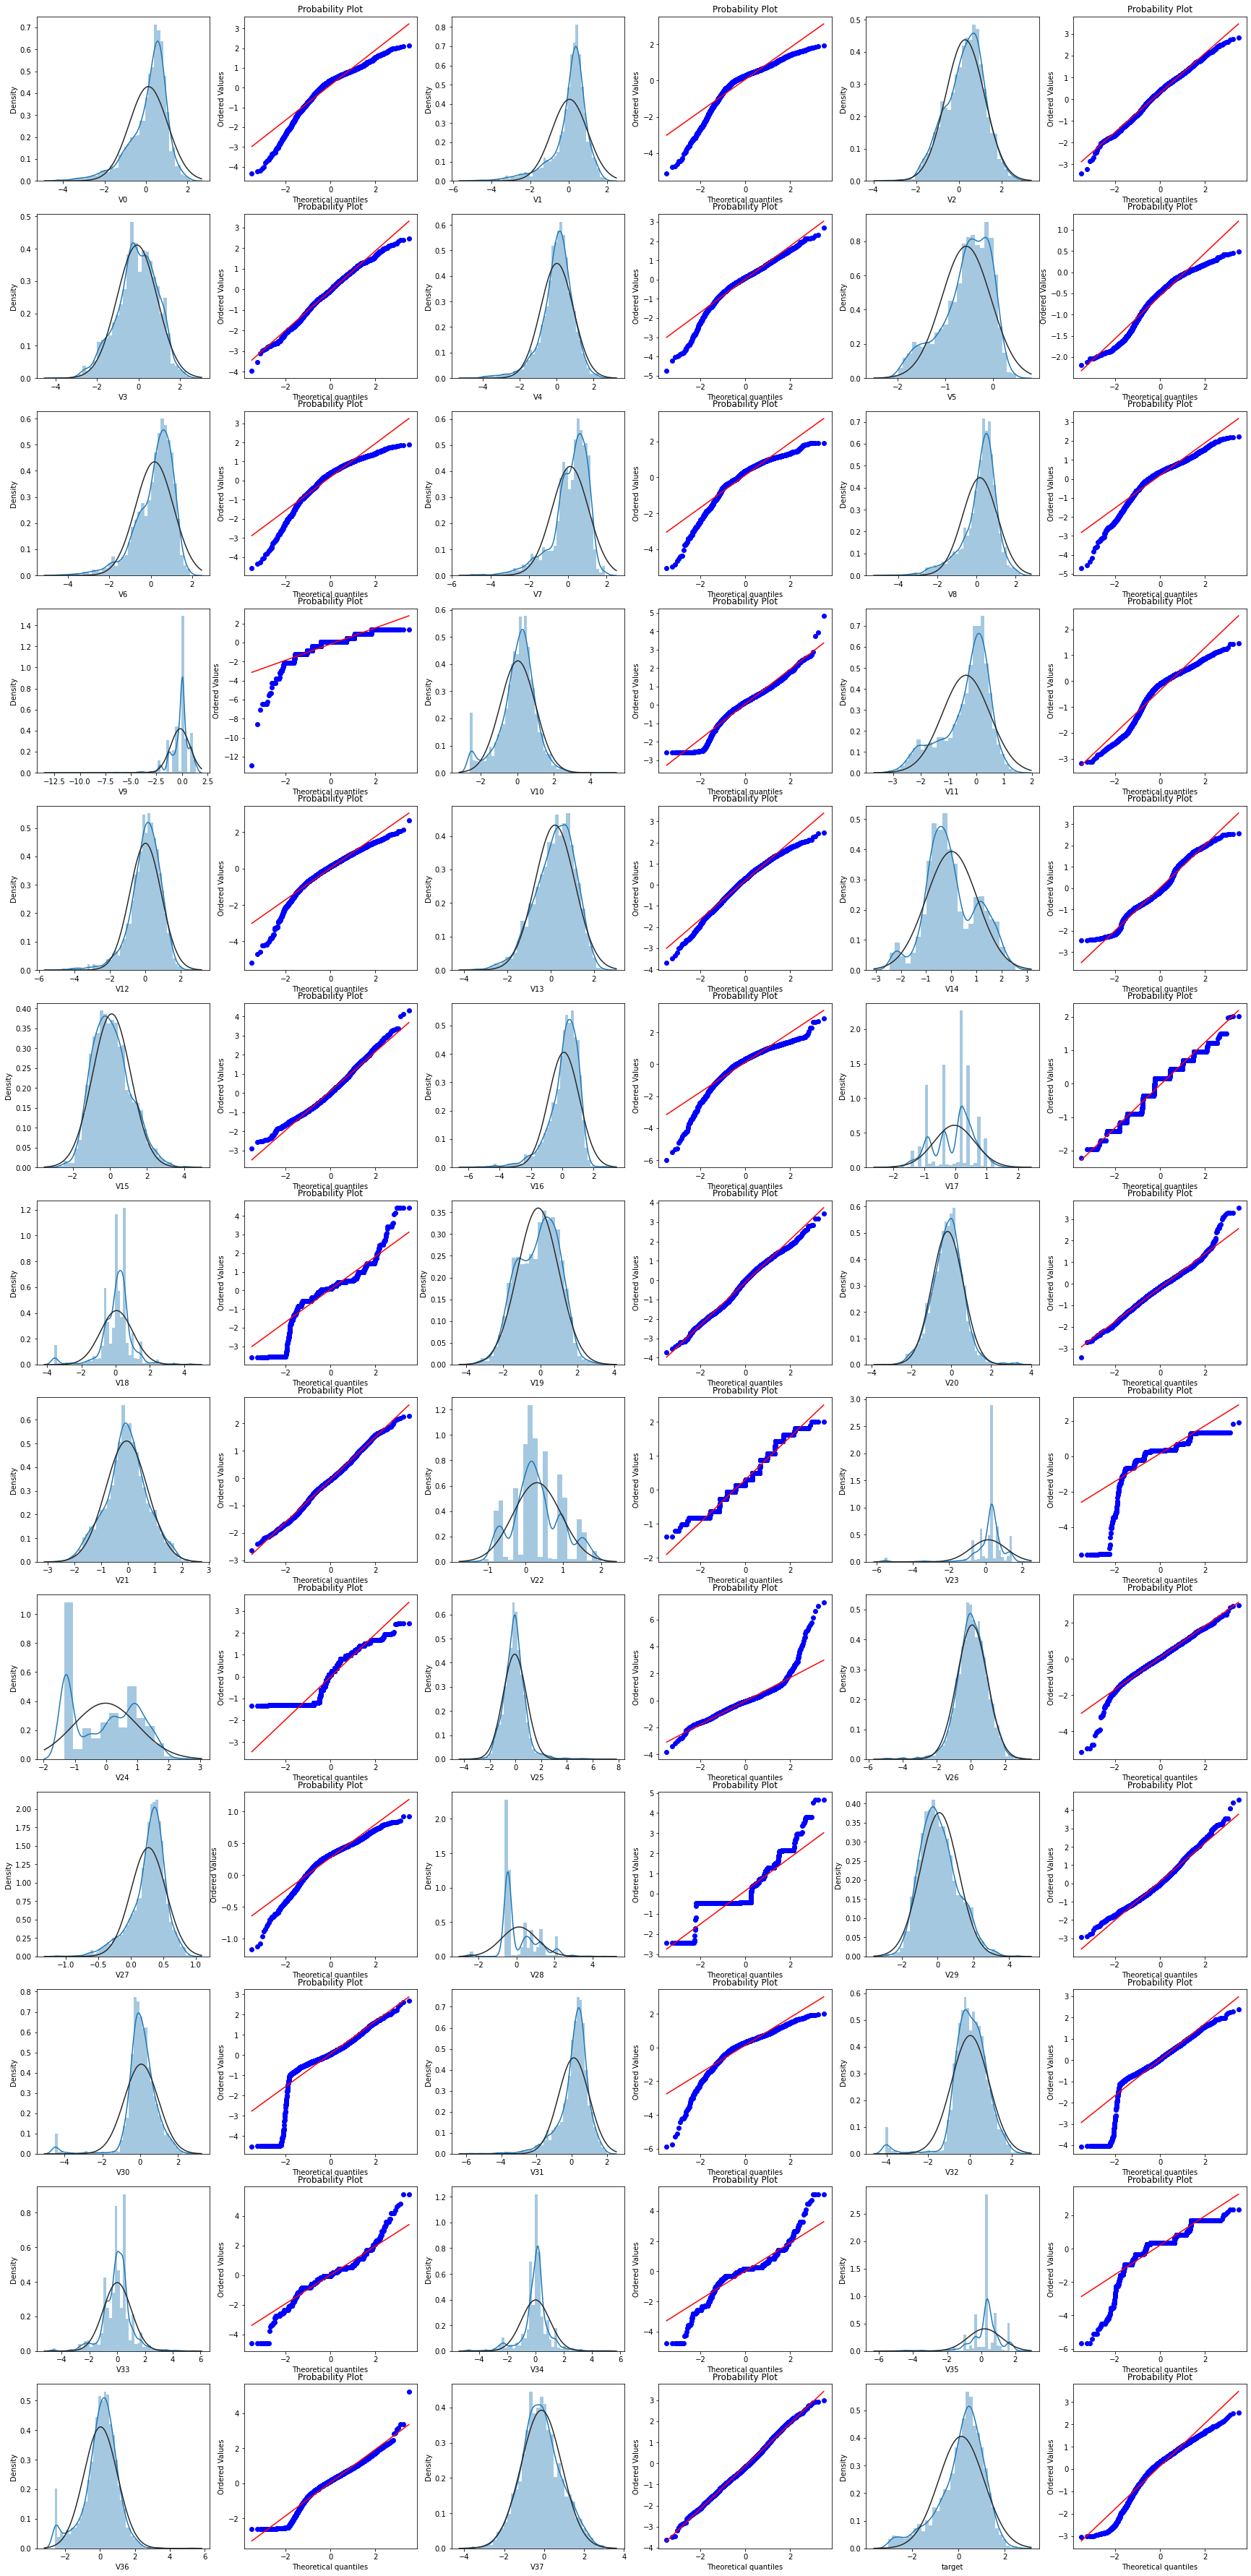

In [8]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(5*train_cols,5*train_rows))

i=0
for col in train_data.columns:
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(train_data[col],fit=stats.norm)
    
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(train_data[col], plot=plt)
plt.show()

#### 查看所有特征变量下，训练集数据和测试集数据的分布情况，分析并寻找出数据分布不一致的特征变量。

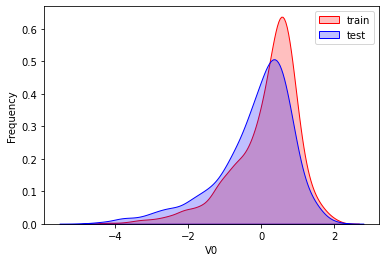

In [9]:
ax = sns.kdeplot(train_data['V0'], color="Red", shade=True)
ax = sns.kdeplot(test_data['V0'], color="Blue", shade=True)
ax.set_xlabel('V0')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

In [10]:
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))

i=1
for col in test_data.columns:
    ax=plt.subplot(dist_rows,dist_cols,i)
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i+=1
plt.show()

#### 由上图的数据分布可以看到特征'V5','V9','V11','V17','V22','V28' 训练集数据与测试集数据分布不一致，会导致模型泛化能力差，采用删除此类特征方法。

In [ ]:
drop_columns= ['V5','V9','V11','V17','V22','V28']

### 可视化线性回归关系

In [ ]:
fcols = 2
frows = 1

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.regplot(x='V0', y='target', data=train_data, ax=ax, 
            scatter_kws={'marker':'.','s':3,'alpha':0.3},
            line_kws={'color':'k'});
plt.xlabel('V0')
plt.ylabel('target')

ax=plt.subplot(1,2,2)
sns.distplot(train_data['V0'].dropna())
plt.xlabel('V0')

plt.show()

In [ ]:
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in test_data.columns:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='target', data=train_data, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

### 查看特征变量的相关性

In [ ]:
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1)
train_corr = data_train1.corr()
train_corr

In [ ]:

#! 画出相关性热力图
ax = plt.subplots(figsize=(20, 16))#调整画布大小

ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)#画热力图   annot=True 显示系数

In [ ]:
# 找出相关程度
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1)

plt.figure(figsize=(20, 16))  #! 指定绘图对象宽度和高度
colnm = data_train1.columns.tolist()  #! 列表头
mcorr = data_train1[colnm].corr(method="spearman")  #! 相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(mcorr, dtype=np.bool)  # !构造与mcorr同维数矩阵 为bool型
mask[np.triu_indices_from(mask)] = True  #! 角分线右侧为True
cmap = sns.diverging_palette(220, 10, as_cmap=True)  #!返回matplotlib colormap对象
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  #! 热力图（看两两相似度）
plt.show()

### 查找出特征变量和target变量相关系数大于0.5的特征变量

In [ ]:
#寻找K个最相关的特征信息
k = 10 # number of variables for heatmap
cols = train_corr.nlargest(k, 'target')['target'].index

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10, 10))#调整画布大小
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True)
#g = sns.heatmap(train_data[cols].corr(),annot=True,square=True,cmap="RdYlGn")
hm = sns.heatmap(train_data[cols].corr(),annot=True,square=True)

plt.show()

In [ ]:
threshold = 0.5

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"])>threshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
drop_columns.clear()
drop_columns = ['V5','V9','V11','V17','V22','V28']
threshold = 0.1
# Absolute value correlation matrix
corr_matrix = data_train1.corr().abs()
corr_matrix
drop_col=corr_matrix[corr_matrix["target"]<threshold].index
drop_col.tolist()

In [ ]:
train_x =  train_data.drop(['target'], axis=1)

data_all = pd.concat([train_x,test_data]) 
data_all.drop(drop_col.tolist()+drop_columns,axis=1,inplace=True)
data_all.head()

### 归一化

In [ ]:
# normalise numeric columns
cols_numeric=list(data_all.columns)

def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax,axis=0)
data_all[cols_numeric].describe()

In [ ]:
train_data_process = train_data[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax,axis=0)

test_data_process = test_data[cols_numeric]
test_data_process = test_data_process[cols_numeric].apply(scale_minmax,axis=0)


### 对偏态数据进行正态化转化

In [ ]:
## Check effect of Box-Cox transforms on distributions of continuous variables
cols_numeric_left = cols_numeric[0:13]
cols_numeric_right = cols_numeric[13:]
train_data_process = pd.concat([train_data_process, train_data['target']], axis=1)

fcols = 6
frows = len(cols_numeric_left)
plt.figure(figsize=(4*fcols,4*frows))
i=0

for var in cols_numeric_left:
    dat = train_data_process[[var, 'target']].dropna()
        
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(dat[var] , fit=stats.norm);
    plt.title(var+' Original')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(dat[var], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(dat[var], dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))

    i+=1
    plt.subplot(frows,fcols,i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
    trans_var = scale_minmax(trans_var)      
    sns.distplot(trans_var , fit=stats.norm);
    plt.title(var+' Tramsformed')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(trans_var, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var, dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

In [ ]:
fcols = 6
frows = len(cols_numeric_right)
plt.figure(figsize=(4*fcols,4*frows))
i=0

for var in cols_numeric_right:
    dat = train_data_process[[var, 'target']].dropna()
        
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(dat[var] , fit=stats.norm);
    plt.title(var+' Original')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(dat[var], plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(dat[var], dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))

    i+=1
    plt.subplot(frows,fcols,i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
    trans_var = scale_minmax(trans_var)      
    sns.distplot(trans_var , fit=stats.norm);
    plt.title(var+' Tramsformed')
    plt.xlabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    _=stats.probplot(trans_var, plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
        
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var, dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))